## Important imports

In [1]:
#for data handling
import pandas as pd
import numpy as np

#for plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'


#for svm and mlp classifier
import sklearn
from sklearn import svm
from sklearn import neural_network

pd.options.mode.chained_assignment = None  


## Dataset processing

In [2]:
#Dataframe reading with appropriate columns
data = pd.read_csv("iris.data",names=["Sepal Length", "Sepal Width","Petal Length" ,"Petal Width", "Class Label"])

In [3]:
#print First Five entries of the dataframe
print("Shape of data: ",data.shape)
print(data.head())

Shape of data:  (150, 5)
   Sepal Length  Sepal Width  Petal Length  Petal Width  Class Label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
#drop duplicate entries if any
data = data.drop_duplicates(keep='first')
print("Shape of data after dropping duplicates: ",data.shape)

Shape of data after dropping duplicates:  (147, 5)


In [5]:
#extract x and y
y = data["Class Label"] 
x = data.drop("Class Label",axis = 1 )

In [6]:
#find basic statistical details about x
print(x.describe())

       Sepal Length  Sepal Width  Petal Length  Petal Width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Standard Scalar Normalization

In [7]:
#Standard Scalar Normalization of x
def normalize(x):
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    x_n = (x - mean)/std
    return x_n

In [8]:
x_norm = normalize(x)

In [9]:
col = x.columns

In [10]:
x = pd.DataFrame(x_norm, columns = col)


In [11]:
print(x.describe())

       Sepal Length   Sepal Width  Petal Length   Petal Width
count  1.470000e+02  1.470000e+02  1.470000e+02  1.470000e+02
mean  -2.443104e-15 -3.147898e-15 -1.380604e-15 -6.185528e-16
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.877292e+00 -2.415930e+00 -1.580498e+00 -1.463097e+00
25%   -9.123902e-01 -5.853026e-01 -1.239417e+00 -1.199201e+00
50%   -6.810107e-02 -1.276458e-01  3.522961e-01  1.202791e-01
75%    6.555753e-01  5.588394e-01  7.502244e-01  7.800192e-01
max    2.464766e+00  3.075952e+00  1.773469e+00  1.703655e+00


In [12]:
print("After normalization, mean of each column is close to 0 while standard deviation of each column is close to 1")

After normalization, mean of each column is close to 0 while standard deviation of each column is close to 1


## Random splitting of data into test and training dataset

In [13]:
#re-concatenate x and y to form dataframe
df = pd.concat([x,y],axis=1)

In [14]:
d = df.sample(frac = 1,random_state=2) #returns a randomly jumbles data
div = int(0.8 * d.shape[0])#calculate 80 percent of the number of input datapoints

#categorical encoding
d.loc[data['Class Label']=="Iris-setosa","Class Label"]=0
d.loc[data['Class Label']=="Iris-versicolor","Class Label"]=1
d.loc[data['Class Label']=="Iris-virginica","Class Label"]=2

d_train, d_test = d.iloc[:div,:], d.iloc[div:,:]#split the data into test and train
    
d_train_x = d_train.iloc[:,:-1].values#set training data featutre matrix
d_train_y = d_train.iloc[:,-1].values#set training data output label
d_test_x = d_test.iloc[:,:-1].values#set test data feature matrix
d_test_y = d_test.iloc[:,-1].values#set test data output label
d_train_y = d_train_y.astype("int")
d_test_y = d_test_y.astype("int")

In [15]:
print("Training Dataset shape: ",d_train.shape)

Training Dataset shape:  (117, 5)


In [16]:
print("Testing Dataset shape: ",d_test.shape)


Testing Dataset shape:  (30, 5)


## SVM with linear kernel

In [17]:
print("SVM Classifier with Linear kernel...........")
clf = svm.SVC(kernel='linear',random_state=42)
clf.fit(d_train_x, d_train_y)
y_pred = clf.predict(d_test_x)
print("SVM with Linear kernel:",np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)

SVM Classifier with Linear kernel...........
SVM with Linear kernel: [0.9]


## SVM with quadratic kernel 

In [18]:
print("SVM Classifier with Quadratic kernel.........")
clf = svm.SVC(kernel='poly',degree=2,random_state=42)
clf.fit(d_train_x, d_train_y)
y_pred = clf.predict(d_test_x)
print("SVM with quadratic kernel: ",np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)

SVM Classifier with Quadratic kernel.........
SVM with quadratic kernel:  [0.83333333]


## SVM with radial basis function kernel

In [19]:
print("SVM CLassifer with radial basis function kernel........")
clf = svm.SVC(kernel='rbf',random_state=42)
clf.fit(d_train_x, d_train_y)
y_pred = clf.predict(d_test_x)

print("SVM with radial basis function kernel: ",np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)

SVM CLassifer with radial basis function kernel........
SVM with radial basis function kernel:  [0.93333333]


## MLP with 16 nodes hidden layers

In [20]:
print("MLP Classifer with one hidden layer of 16 nodes.........")
model_1 = neural_network.MLPClassifier(hidden_layer_sizes =(16),solver='sgd',batch_size=32, alpha = 0.001,max_iter=2000,shuffle=False,random_state=2 )
model_1.fit(d_train_x,d_train_y)
y_pred_one_layer = model_1.predict(d_test_x)
print("Accuracy of One 16 node hidden layer MLP Classifier: ",np.sum(y_pred_one_layer == d_test_y.astype("int"))/d_test_y.shape)
accuracy_1 = np.sum(y_pred_one_layer == d_test_y.astype("int"))/d_test_y.shape

MLP Classifer with one hidden layer of 16 nodes.........
Accuracy of One 16 node hidden layer MLP Classifier:  [0.93333333]


## MLP with 256,16 nodes hidden layers

In [21]:
print("MLP Classifer with two hidden layer of 256 and 16 nodes.........")
model_2 = neural_network.MLPClassifier(hidden_layer_sizes =(256,16),solver='sgd',batch_size=32, alpha = 0.001,max_iter=2000,shuffle=False,random_state=2 )
model_2.fit(d_train_x,d_train_y)
y_pred_two_layer = model_2.predict(d_test_x)
print("Accuracy of 256,16 node hidden layer MLP Classifier: ",np.sum(y_pred_two_layer == d_test_y.astype("int"))/d_test_y.shape)
accuracy_2 = np.sum(y_pred_two_layer == d_test_y.astype("int"))/d_test_y.shape

MLP Classifer with two hidden layer of 256 and 16 nodes.........
Accuracy of 256,16 node hidden layer MLP Classifier:  [0.9]


## Best MLP Variant accuracy vs learning rate

In [22]:
if accuracy_1 > accuracy_2:
    print("Model 1 with one hidden layer has better accuracy")
else:
     print("Model 2 with two hidden layers has better accuracy")

Model 1 with one hidden layer has better accuracy


In [23]:
x=[]
y = []
for i in [0.00001,0.0001,0.001,0.01,0.1]:
    if accuracy_1 > accuracy_2:
        model = neural_network.MLPClassifier(hidden_layer_sizes =(16),solver='sgd',batch_size=32, alpha = i,max_iter=2000 ,shuffle=False,random_state=2)
    else:
        model = neural_network.MLPClassifier(hidden_layer_sizes =(256,16),solver='sgd',batch_size=32, alpha = i,max_iter=2000,shuffle=False,random_state=2 )
    model.fit(d_train_x,d_train_y)
    y.append([model.n_iter_,model.loss_curve_])
    y_pred = model.predict(d_test_x)
    x.append(np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape)
    

## Best MLP variant Error vs learning rate curve

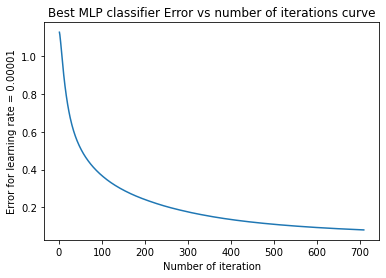

In [24]:
plt.title("Best MLP classifier Error vs number of iterations curve")
plt.plot(np.arange(1, y[0][0]+1),y[0][1]);
plt.xlabel("Number of iteration");
plt.ylabel("Error for learning rate = 0.00001");
plt.savefig('error_0.00001.png', bbox_inches='tight')

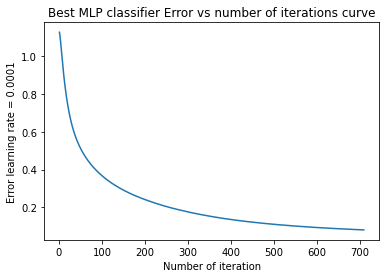

In [25]:
plt.title("Best MLP classifier Error vs number of iterations curve")
plt.plot(np.arange(1, y[1][0]+1),y[1][1]);
plt.xlabel("Number of iteration");
plt.ylabel("Error learning rate = 0.0001");

plt.savefig('error_0.0001.png', bbox_inches='tight')

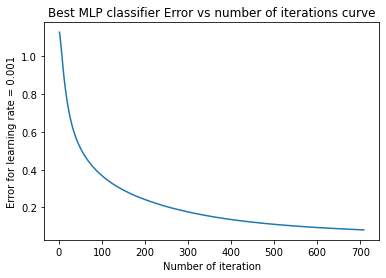

In [26]:
plt.title("Best MLP classifier Error vs number of iterations curve")
plt.plot(np.arange(1, y[2][0]+1),y[2][1]);
plt.xlabel("Number of iteration");
plt.ylabel("Error for learning rate = 0.001");

plt.savefig('error_0.001.png', bbox_inches='tight')

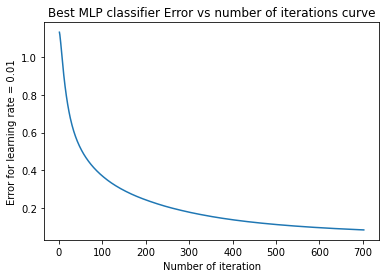

In [27]:
plt.title("Best MLP classifier Error vs number of iterations curve")
plt.plot(np.arange(1, y[3][0]+1),y[3][1]);
plt.xlabel("Number of iteration");
plt.ylabel("Error for learning rate = 0.01");

plt.savefig('error_0.01.png', bbox_inches='tight')

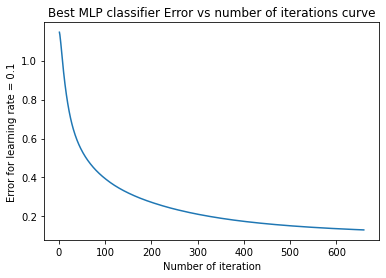

In [28]:
plt.title("Best MLP classifier Error vs number of iterations curve")
plt.plot(np.arange(1, y[4][0]+1),y[4][1]);
plt.xlabel("Number of iteration");
plt.ylabel("Error for learning rate = 0.1");
plt.savefig('error_0.1.png', bbox_inches='tight')

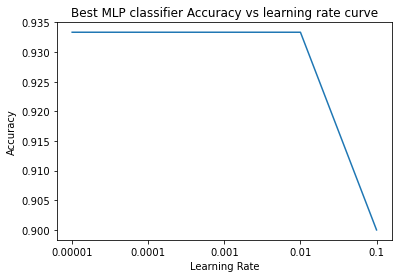

In [29]:
plt.title("Best MLP classifier Accuracy vs learning rate curve")
plt.plot(['0.00001','0.0001','0.001','0.01','0.1'],x);
plt.xlabel("Learning Rate");
plt.ylabel("Accuracy");

plt.savefig('accuracy vs learning_rate.png', bbox_inches='tight')

In [30]:
#find the best of the two variants of MLP classifier
if accuracy_1> accuracy_2:
    model = model_1
    accuracy = accuracy_1
else:
    model = model_2
    accuracy = accuracy_2

In [31]:
print("Following is the best variabt of MLP classifier: ")
print(model)

Following is the best variabt of MLP classifier: 
MLPClassifier(alpha=0.001, batch_size=32, hidden_layer_sizes=16, max_iter=2000,
              random_state=2, shuffle=False, solver='sgd')


## Backward elimination

In [32]:
features = d.columns

In [33]:
features = features[:-1]

In [34]:
print(features)

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], dtype='object')


In [35]:
d_train_b = d_train
d_test_b = d_test
print("Accuracy before backward elimination: ", accuracy)
print("Number of features before backward elimination: ", features.shape[0])

Accuracy before backward elimination:  [0.93333333]
Number of features before backward elimination:  4


In [36]:
print("Backward Elimination in progress: ")
print("Features left in each iteration: ")

while features.size >= 2: #do while you have more than 2 features i.e. we have features that can be removed
    max_accuracy = 0    #max accuracy initialised to 0
    f = "null"          #flag to find the index to be dropped 
     
    #find the faeture f of x with maximum E(x-f) where E is accuracy
    for i in features:
        d_train_elim = d_train_b.drop(i,axis=1)
        d_test_elim = d_test_b.drop(i,axis=1)
        
        d_train_x = d_train_elim.iloc[:,:-1].values#set training data featutre matrix
        d_train_y = d_train_elim.iloc[:,-1].values#set training data output label
        d_test_x = d_test_elim.iloc[:,:-1].values#set test data feature matrix
        d_test_y = d_test_elim.iloc[:,-1].values#set test data output label

        d_train_y = d_train_y.astype("int")
        d_test_y = d_test_y.astype("int")
        
        model.fit(d_train_x,d_train_y)
        y_pred = model.predict(d_test_x)
        temp_accuracy = np.sum(y_pred == d_test_y.astype("int"))/d_test_y.shape
        
        #find the feature that brings the maximum accuarcy after it is removed from the data
        if max_accuracy < temp_accuracy:
            f = i
            max_accuracy = temp_accuracy

    #if the accuracy found after removing a feature is greater or equal to the accuracy of the original model
    #update the accuracy and permanently remove the columns
    #continue the process for the new set of features
    
    if max_accuracy >= accuracy:
        d_train_b.drop(f,axis=1,inplace=True)
        d_test_b.drop(f,axis=1,inplace=True)
        features = d_train_b.columns
        features = features[:-1] #remove the class label column
        accuracy = max_accuracy
        
    #in case no such feature exists whose reduction brings improvement in accuracy terminate the process
    elif max_accuracy < accuracy:
        break
    print(features)     #print features after every iteration
    

Backward Elimination in progress: 
Features left in each iteration: 
Index(['Sepal Width', 'Petal Length', 'Petal Width'], dtype='object')
Index(['Sepal Width', 'Petal Width'], dtype='object')
Index(['Petal Width'], dtype='object')


In [37]:
print("Accuracy after backward elimination: ", accuracy)
print("Number of features after backward elimination: ", features.shape[0])

Accuracy after backward elimination:  [0.93333333]
Number of features after backward elimination:  1


In [38]:
print("Columns after backward Elimination: ",d_train_b.columns)

Columns after backward Elimination:  Index(['Petal Width', 'Class Label'], dtype='object')


## Ensemble Learning

In [39]:
div = int(0.8 * d.shape[0])#calculate 80 percent of the number of input datapoints
d_train, d_test = d.iloc[:div,:], d.iloc[div:,:]#split the data into test and train
    
d_train_x = d_train.iloc[:,:-1].values#set training data featutre matrix
d_train_y = d_train.iloc[:,-1].values#set training data output label
d_test_x = d_test.iloc[:,:-1].values#set test data feature matrix
d_test_y = d_test.iloc[:,-1].values#set test data output label
d_train_y = d_train_y.astype("int")
d_test_y = d_test_y.astype("int")

In [40]:
if accuracy_1> accuracy_2:
    model = model_1
    accuracy = accuracy_1
else:
    model = model_2
    accuracy = accuracy_2

In [41]:
clf = svm.SVC(kernel='rbf',random_state=42)
clf.fit(d_train_x, d_train_y)
y_pred_svm = clf.predict(d_test_x)
print("SVM with quadratic kernel Accuracy: ",np.sum(y_pred_svm == d_test_y.astype("int"))/d_test_y.shape)

SVM with quadratic kernel Accuracy:  [0.93333333]


In [42]:
clf = svm.SVC(kernel='poly',degree=2,random_state=42)
clf.fit(d_train_x, d_train_y)
y_pred_svm_q = clf.predict(d_test_x)
print("SVM with quadratic kernel Accuracy: ",np.sum(y_pred_svm_q == d_test_y.astype("int"))/d_test_y.shape)

SVM with quadratic kernel Accuracy:  [0.83333333]


In [43]:
model.fit(d_train_x,d_train_y)
y_mlp = model.predict(d_test_x)
print("MLP Classifier Accuracy: ",np.sum(y_mlp == d_test_y.astype("int"))/d_test_y.shape)

MLP Classifier Accuracy:  [0.93333333]


In [44]:
c = np.stack((y_pred_svm, y_pred_svm_q,y_mlp),axis=0) #make a 2 dimensional array by stacking all individual predicted list as rows

In [45]:
c.shape

(3, 30)

In [46]:
print("Predictions before ensemble learning: ")
print(c)

Predictions before ensemble learning: 
[[1 0 1 1 1 1 1 0 2 0 2 1 2 0 2 0 2 2 0 1 0 2 1 0 1 2 0 0 1 0]
 [1 0 1 1 1 1 1 0 0 0 0 1 2 0 2 0 0 2 0 1 0 2 1 0 1 1 2 0 1 0]
 [1 0 2 1 1 1 1 0 2 0 2 1 2 0 2 0 2 2 0 1 0 2 1 0 2 2 0 0 1 0]]


In [47]:
c_d = pd.DataFrame(c) #convert c to dataframe

In [48]:
print("Predictions after ensemble learning: ")
print(c_d.mode().loc[0].astype("int"))

Predictions after ensemble learning: 
0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     2
9     0
10    2
11    1
12    2
13    0
14    2
15    0
16    2
17    2
18    0
19    1
20    0
21    2
22    1
23    0
24    1
25    2
26    0
27    0
28    1
29    0
Name: 0, dtype: int32


In [49]:
x = c_d.mode().loc[0].astype("int") #find the mode of columns of c and convert datatype to int

In [50]:
print("Accuracy after ensemble learning: ",np.sum(x == d_test_y.astype("int"))/d_test_y.shape)

Accuracy after ensemble learning:  [0.93333333]
